In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
data = datasets.load_boston()

In [8]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [10]:
tgt=pd.DataFrame(data.target,columns=['MEDV'])

In [19]:
tdf=pd.merge(df,tgt,left_index=True,right_index=True)

In [22]:
corr=tdf.corr()

<AxesSubplot:>

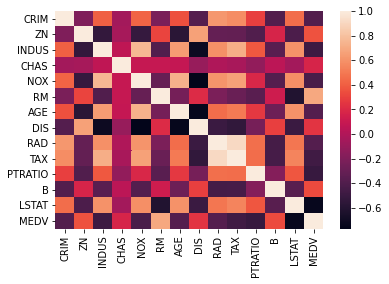

In [23]:
sns.heatmap(corr)

In [27]:
corr.MEDV

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [29]:
np.abs(corr.MEDV).sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

#### Trzy najbardziej skorelowane zmienne ze zmieną objaśnianą to LSTAT, RM, PTRATIO

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

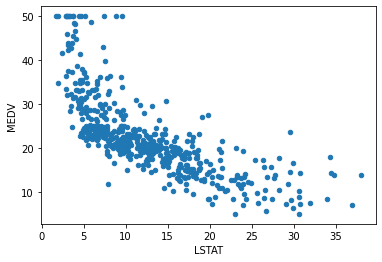

In [31]:
tdf.plot.scatter('LSTAT','MEDV')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

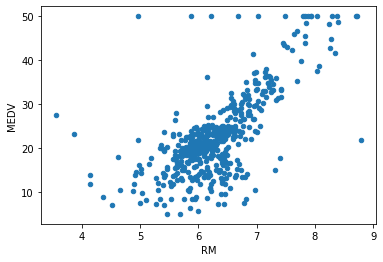

In [32]:
tdf.plot.scatter('RM','MEDV')

<AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>

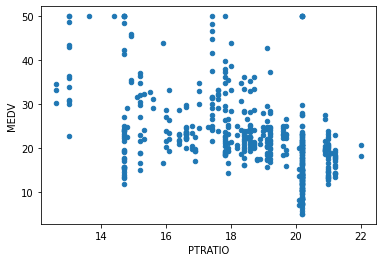

In [33]:
tdf.plot.scatter('PTRATIO','MEDV')

In [35]:
tdf.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [37]:
X_train,X_test, y_train, y_test=train_test_split(tdf[['LSTAT','RM','PTRATIO']],tdf.MEDV,test_size=0.2,random_state=0)

In [39]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4881642015692508

In [40]:
model.coef_

array([-0.57552137,  4.26494747, -1.13654724])

In [44]:
model.intercept_

24.03109342937118

In [58]:
model.score(X_train,y_train)

0.721859247739624

##### Model regresji liniowej zbudowany na podstawie tych 3 zmiennych ma postać MEDV = 24.03 -0,58LSTAT +4.26RM -1.14PTRATIO ze współczynnikiem R2 0.49 na danych testowych

In [46]:
np.mean((model.predict(X_test)-y_test)**2)

41.67799012221685

In [55]:
(np.mean((model.predict(X_test)-y_test)**2))**0.5

6.455849295190901

In [56]:
tdf.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

##### Średni kwadratowy błąd predykcji wynosi 41.68, pierwiastek tego błędu wynosi 6.46, co stanowi około 27% średniej wartości zmiennej objaśnianej

In [53]:
np.mean(((model.predict(X_test)-y_test)/y_test)**2)

0.09462992512027896

In [54]:
np.mean(((model.predict(X_test)-y_test)/y_test)**2)**0.5

0.3076197736171701

##### Średni kwadratowy względny błąd predykcji wynosi 0.09, a pierwiastek tego błędu 0.31 wartości zmiennej objaśnianej